In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional for better visuals
sns.set(style="whitegrid")
%matplotlib inline


In [38]:
df = pd.read_csv('../preprocessed_data_clean.csv')


In [7]:
df

,month,channel,total_revenue,total_orders,aov,total_spend,new_customers,existing_customers,new_customer_orders,existing_customer_orders,...,users,spend,impressions,clicks,returned_value,technology_spend,revenue_share,returns_value_dist,technology_spend_dist,net_revenue
0,1/1/2024,Affiliate,64319.0,523.0,122.98,12864.0,306.0,102.0,310.0,213.0,...,2500.0,12864.0,643200.0,3216.0,25000.0,15000.0,0.05000,1250.00,750.00,63069.0
1,1/1/2024,Direct,195000.0,1500.0,130.00,0.0,800.0,1200.0,810.0,690.0,...,12000.0,0.0,0.0,0.0,25000.0,15000.0,0.15000,3750.00,2250.00,191250.0
2,1/1/2024,Email,280000.0,2500.0,112.00,5000.0,1000.0,4000.0,1010.0,1490.0,...,18000.0,5000.0,250000.0,25000.0,25000.0,15000.0,0.21000,5250.00,3150.00,274750.0
3,1/1/2024,Organic Social,120000.0,1100.0,109.09,2500.0,400.0,1600.0,405.0,695.0,...,8000.0,2500.0,125000.0,6250.0,25000.0,15000.0,0.09000,2250.00,1350.00,117750.0
4,1/1/2024,Paid Search,450000.0,3500.0,128.57,90000.0,2000.0,800.0,2020.0,1480.0,...,28000.0,90000.0,1800000.0,36000.0,25000.0,15000.0,0.34000,8500.00,5100.00,441500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,12/1/2021,Email,300000.0,2700.0,111.11,5600.0,1070.0,4280.0,1080.0,1620.0,...,21000.0,5600.0,280000.0,28000.0,28000.0,16500.0,0.21389,5988.92,3529.19,294011.0
349,12/1/2021,Organic Social,125000.0,1150.0,108.70,2750.0,440.0,1760.0,450.0,700.0,...,8500.0,2750.0,135000.0,6750.0,28000.0,16500.0,0.08910,2494.80,1470.15,122505.0
350,12/1/2021,Paid Search,478000.0,3540.0,135.03,95600.0,2108.0,843.0,2125.0,1415.0,...,29000.0,95600.0,1912000.0,38240.0,28000.0,16500.0,0.34073,9540.44,5622.05,468459.0
351,12/1/2021,Paid Social,227000.0,1770.0,128.25,61000.0,1100.0,440.0,1110.0,660.0,...,22500.0,61000.0,1720000.0,34400.0,28000.0,16500.0,0.16184,4531.52,2670.36,222468.0


In [42]:
df.info()
df.describe(include='all')
df.isnull().sum()
df.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
Index: 352 entries, 0 to 352
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   month                     352 non-null    object 
 1   channel                   352 non-null    object 
 2   total_revenue             352 non-null    float64
 3   total_orders              352 non-null    float64
 4   aov                       352 non-null    float64
 5   total_spend               352 non-null    float64
 6   new_customers             352 non-null    float64
 7   existing_customers        352 non-null    float64
 8   new_customer_orders       352 non-null    float64
 9   existing_customer_orders  352 non-null    float64
 10  sessions                  352 non-null    float64
 11  users                     352 non-null    float64
 12  spend                     352 non-null    float64
 13  impressions               352 non-null    float64
 14  clicks         

np.int64(0)

In [43]:
categorical = df.select_dtypes(include='object').columns
numerical = df.select_dtypes(include=np.number).columns

print("Categorical columns:", list(categorical))
print("Numerical columns:", list(numerical))


Categorical columns: ['month', 'channel']
Numerical columns: ['total_revenue', 'total_orders', 'aov', 'total_spend', 'new_customers', 'existing_customers', 'new_customer_orders', 'existing_customer_orders', 'sessions', 'users', 'spend', 'impressions', 'clicks', 'returned_value', 'technology_spend', 'revenue_share', 'returns_value_dist', 'technology_spend_dist', 'net_revenue']


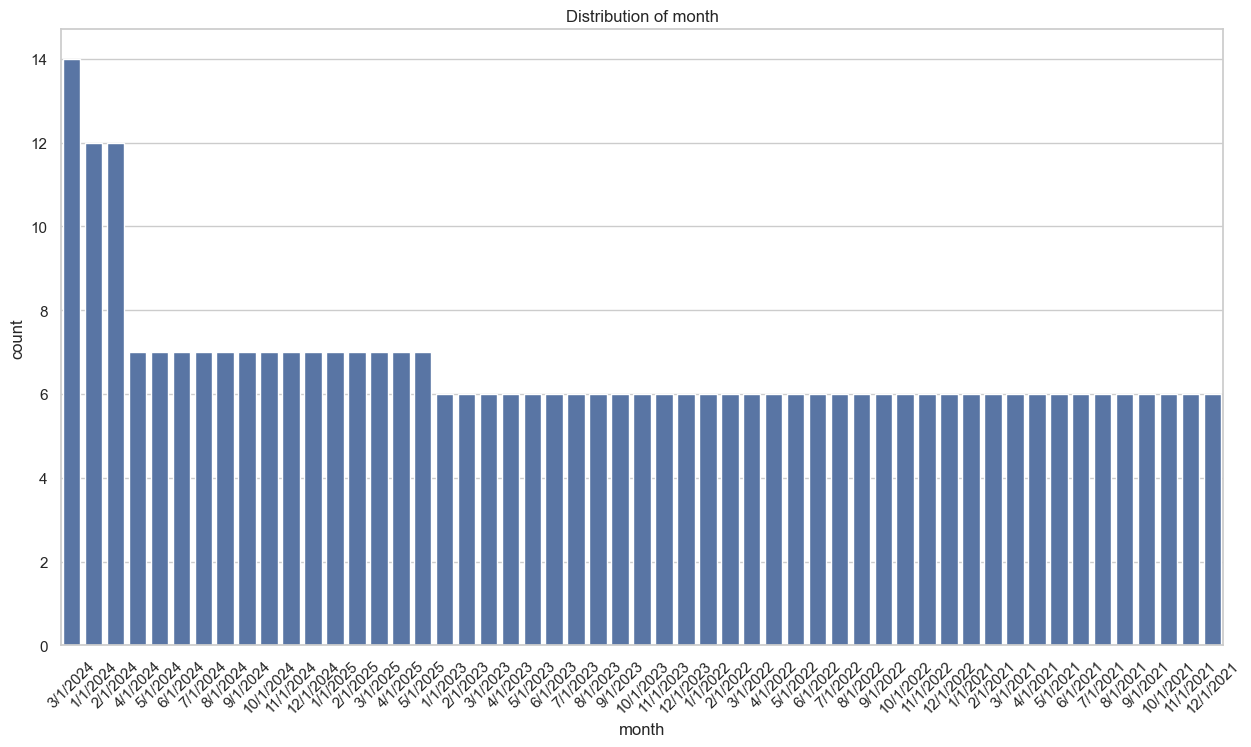

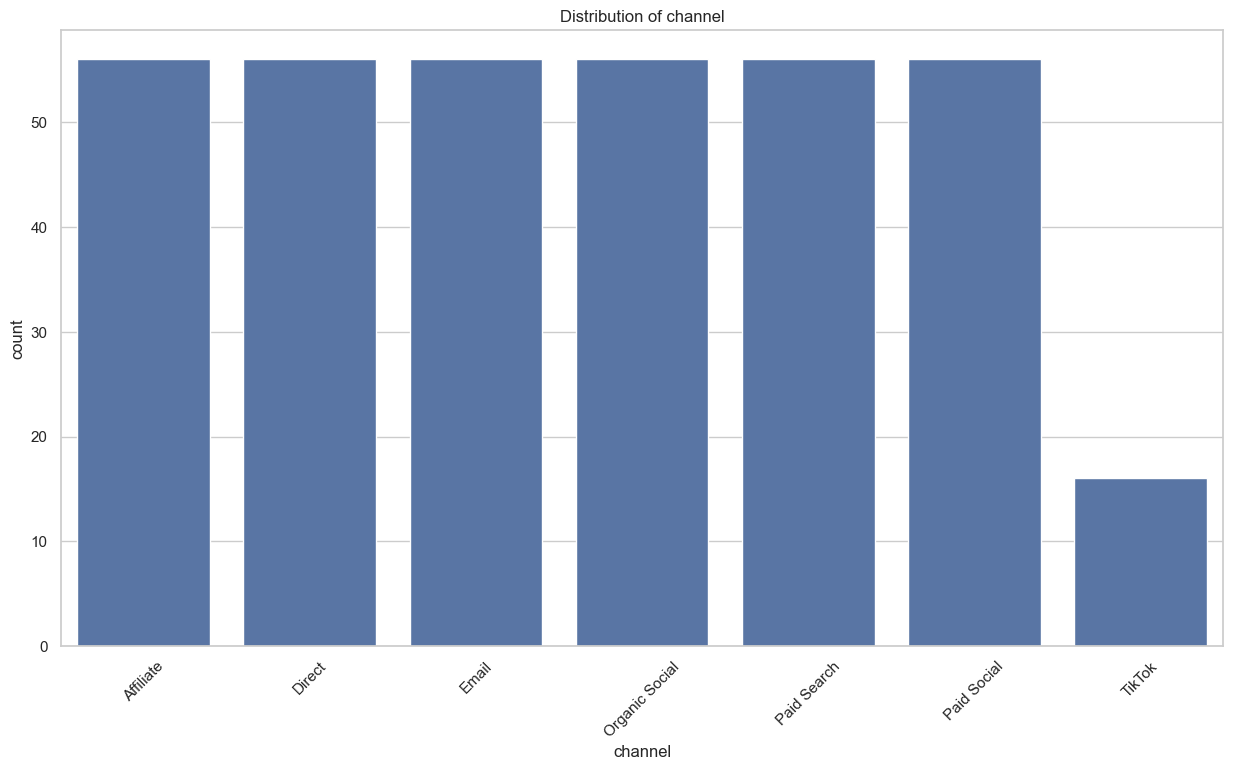

In [44]:
for col in categorical:
    plt.figure(figsize=(15, 8))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f'Distribution of {col}')
    plt.show()


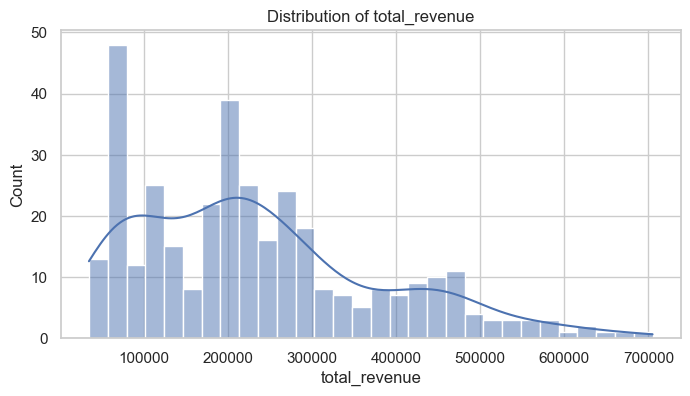

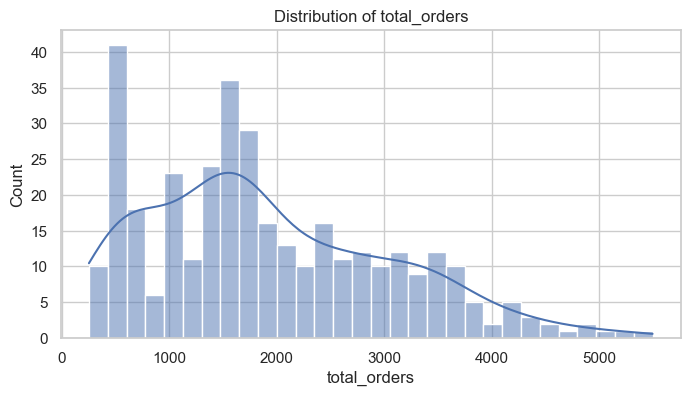

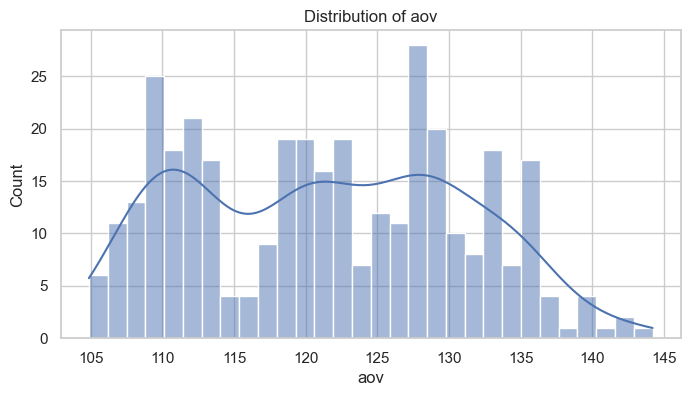

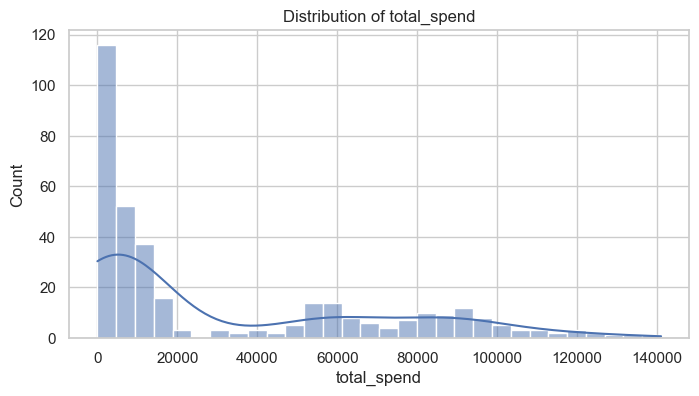

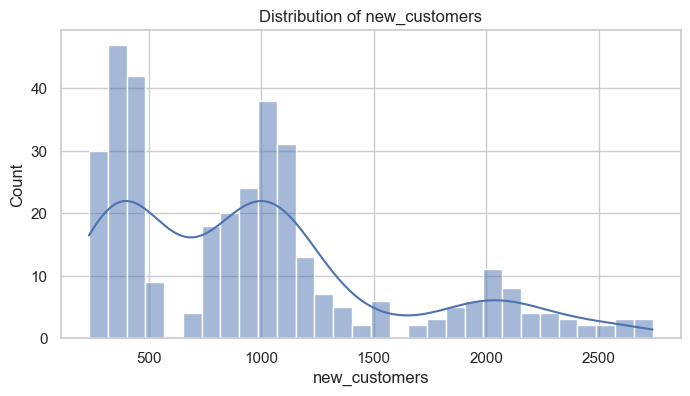

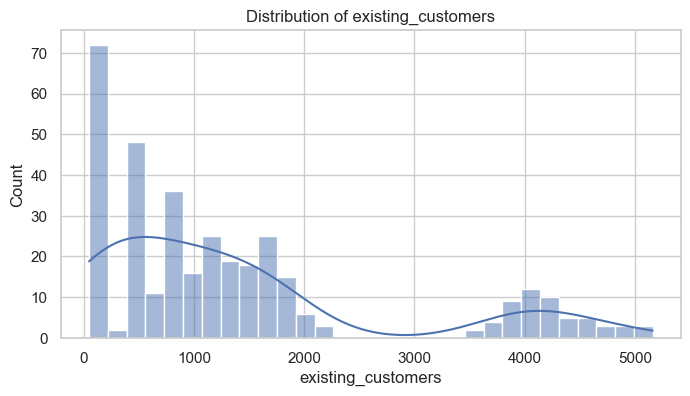

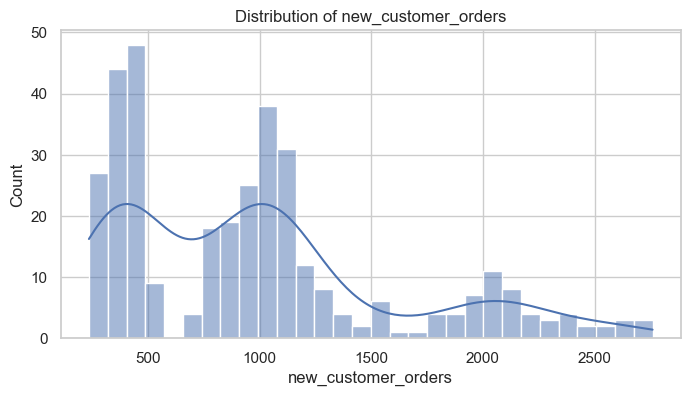

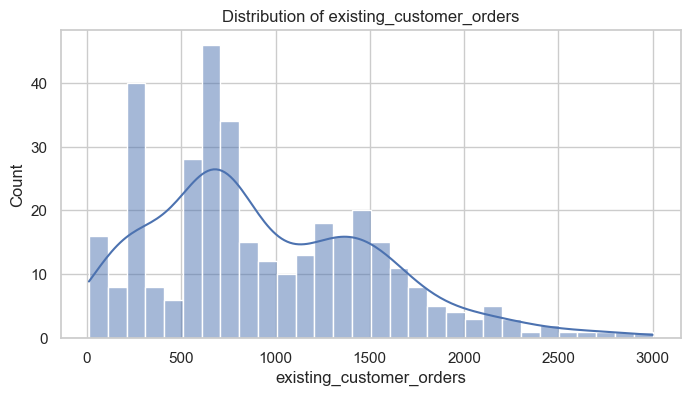

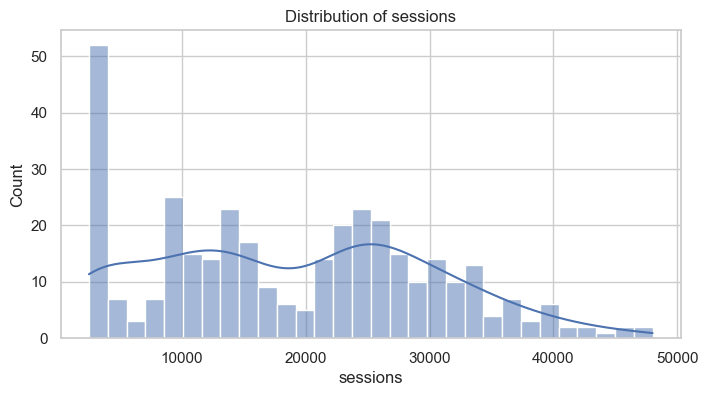

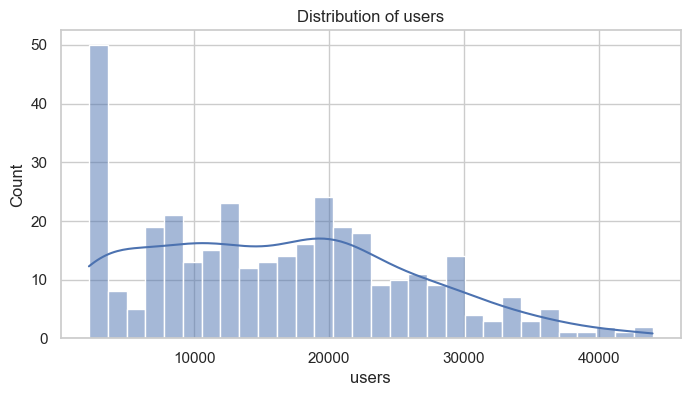

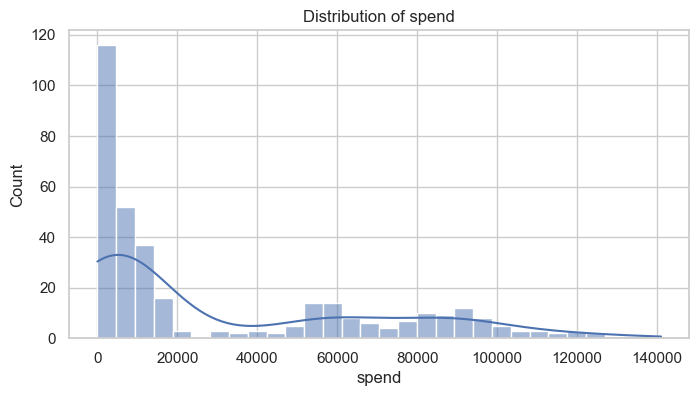

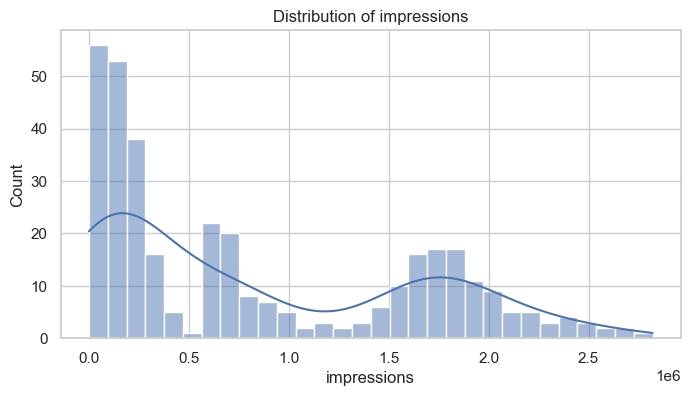

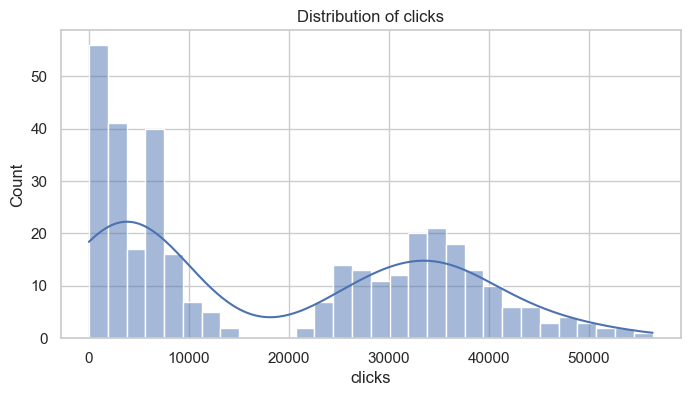

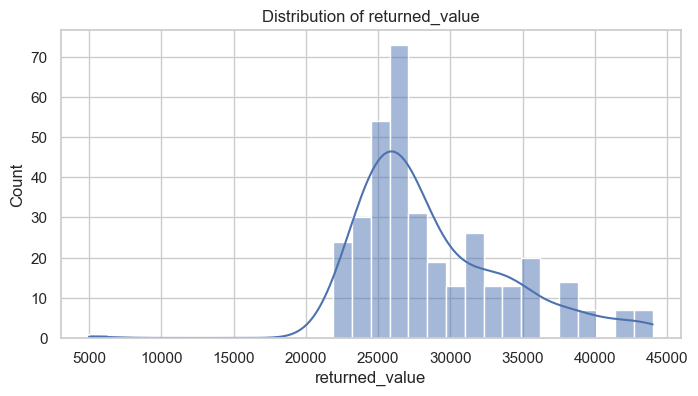

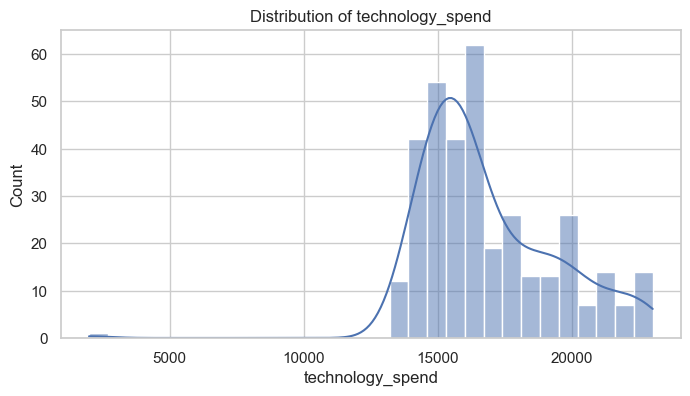

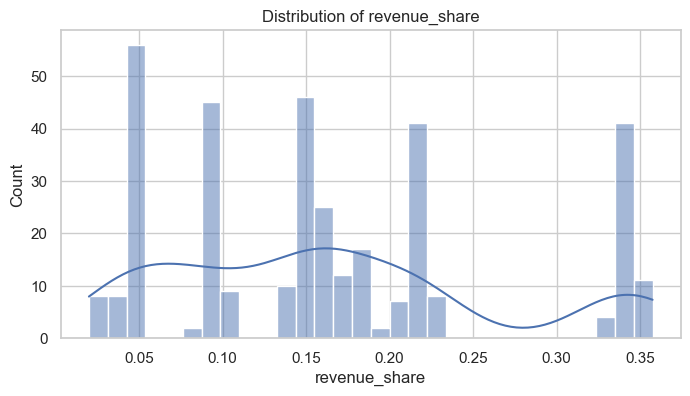

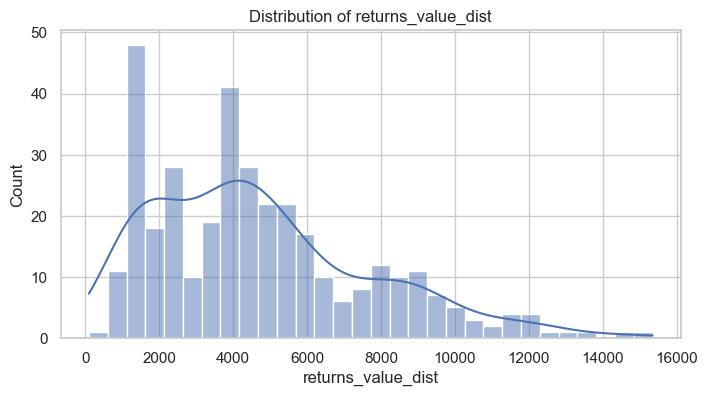

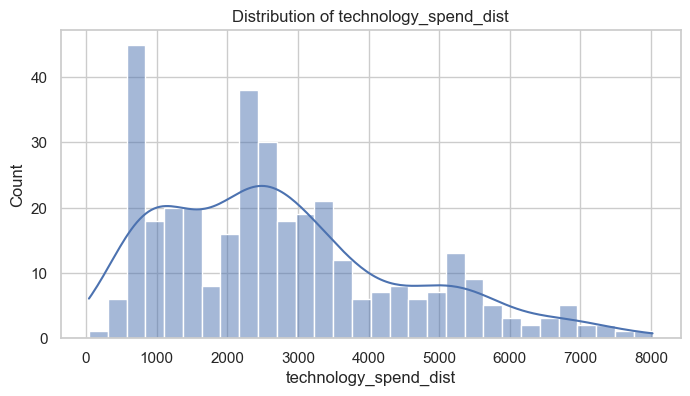

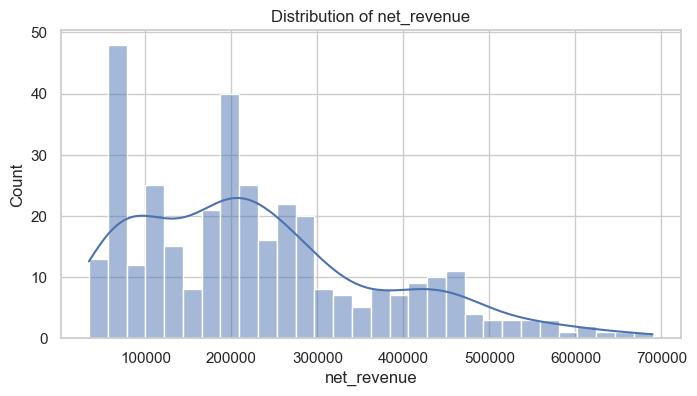

In [45]:
for col in numerical:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


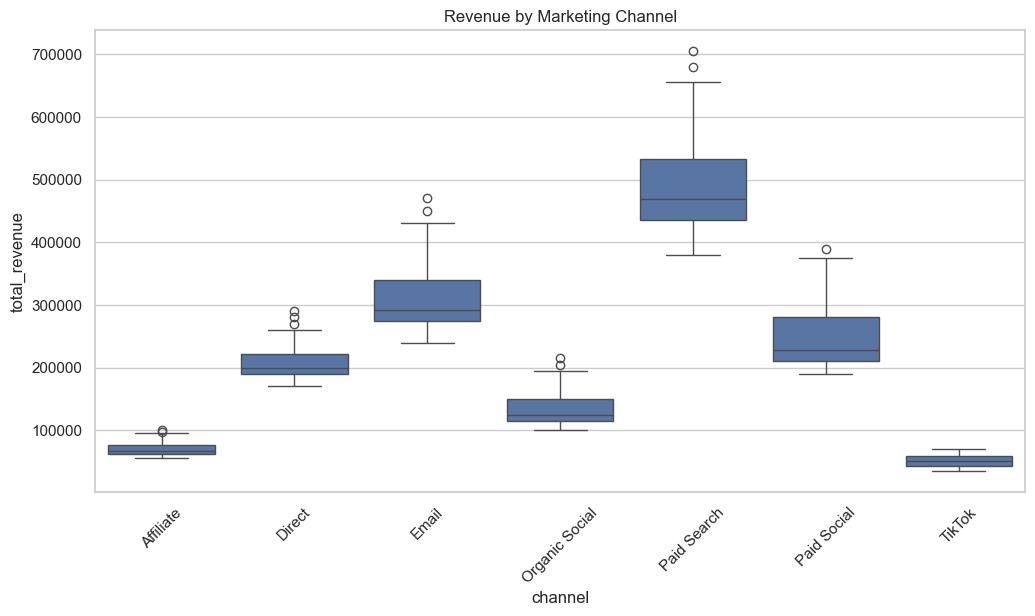

In [46]:
sns.boxplot(data=df, x='channel', y='total_revenue')
plt.xticks(rotation=45)
plt.title('Revenue by Marketing Channel')
plt.show()


In [47]:
print(df.columns.tolist())

['month', 'channel', 'total_revenue', 'total_orders', 'aov', 'total_spend', 'new_customers', 'existing_customers', 'new_customer_orders', 'existing_customer_orders', 'sessions', 'users', 'spend', 'impressions', 'clicks', 'returned_value', 'technology_spend', 'revenue_share', 'returns_value_dist', 'technology_spend_dist', 'net_revenue']


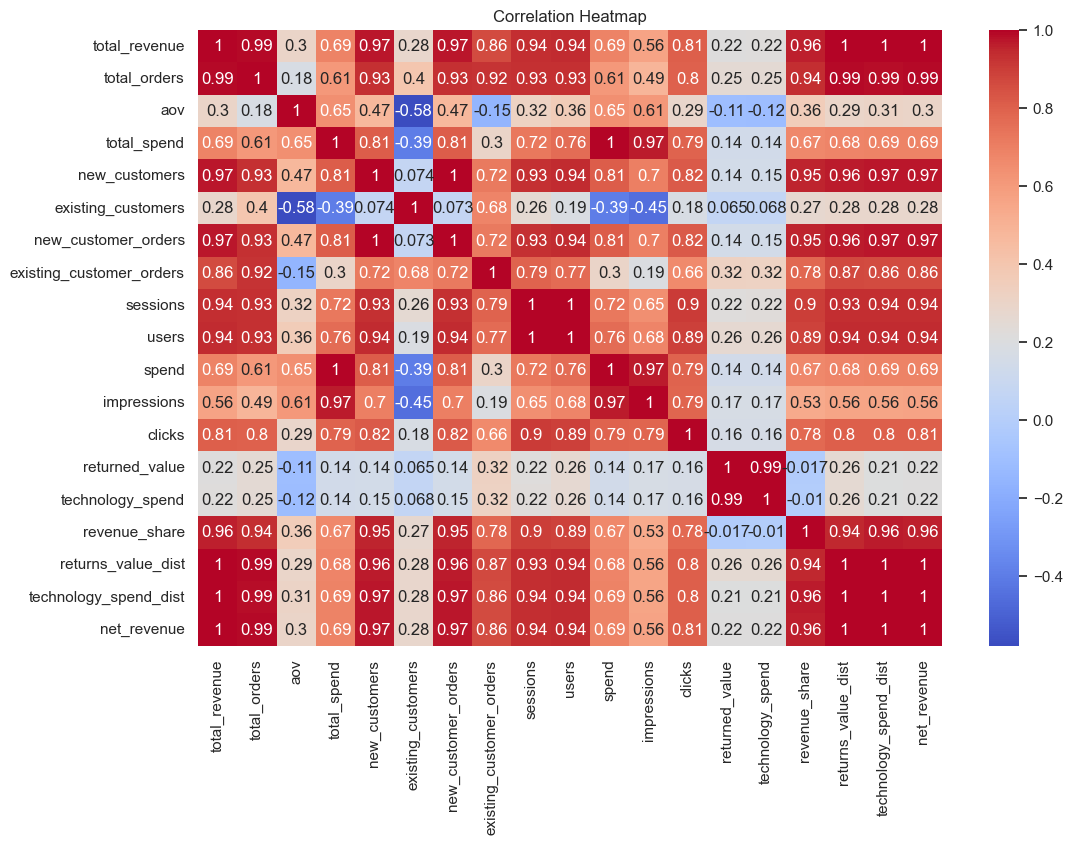

In [48]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [49]:
# First look at the data
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 352 entries, 0 to 352
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   month                     352 non-null    object 
 1   channel                   352 non-null    object 
 2   total_revenue             352 non-null    float64
 3   total_orders              352 non-null    float64
 4   aov                       352 non-null    float64
 5   total_spend               352 non-null    float64
 6   new_customers             352 non-null    float64
 7   existing_customers        352 non-null    float64
 8   new_customer_orders       352 non-null    float64
 9   existing_customer_orders  352 non-null    float64
 10  sessions                  352 non-null    float64
 11  users                     352 non-null    float64
 12  spend                     352 non-null    float64
 13  impressions               352 non-null    float64
 14  clicks         

,total_revenue,total_orders,aov,total_spend,new_customers,existing_customers,new_customer_orders,existing_customer_orders,sessions,users,spend,impressions,clicks,returned_value,technology_spend,revenue_share,returns_value_dist,technology_spend_dist,net_revenue
count,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,3.520000e+02,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000
mean,234731.926136,1917.105114,121.449545,31446.670455,969.534091,1383.340909,980.525568,936.579545,19004.545455,16229.545455,31446.670455,8.260565e+05,18692.150568,28875.000000,16859.375000,0.163603,4714.848437,2755.114176,230017.019886
std,144746.420487,1125.372358,9.452758,37323.685219,613.598037,1361.560514,618.028936,595.885799,11160.951175,9804.060111,37323.685219,7.893542e+05,16228.635717,5339.072766,2551.207224,0.096634,2959.345537,1694.508876,141792.381510
min,35000.000000,250.000000,104.880000,0.000000,233.000000,50.000000,235.000000,10.000000,2500.000000,2200.000000,0.000000,0.000000e+00,0.000000,5000.000000,2000.000000,0.020000,100.000000,40.000000,34314.000000
25%,115750.000000,1057.500000,112.360000,2750.000000,420.000000,426.750000,425.000000,560.000000,9800.000000,8000.000000,2750.000000,1.350000e+05,3400.000000,25000.000000,15000.000000,0.089100,2278.907500,1364.367500,113463.000000
50%,210000.000000,1660.000000,121.430000,12000.000000,932.500000,980.000000,942.500000,772.500000,18500.000000,16000.000000,12000.000000,6.000000e+05,10937.500000,27000.000000,16000.000000,0.148270,4166.570000,2453.780000,205734.500000
75%,300000.000000,2670.000000,128.570000,60000.000000,1160.000000,1680.000000,1172.500000,1350.000000,27000.000000,22525.000000,60000.000000,1.634000e+06,33940.000000,32000.000000,18500.000000,0.213853,6162.337500,3607.815000,294171.750000
max,705000.000000,5500.000000,144.190000,141000.000000,2740.000000,5160.000000,2760.000000,3000.000000,48000.000000,44000.000000,141000.000000,2.820000e+06,56400.000000,44000.000000,23000.000000,0.357390,15348.880000,8023.320000,689651.000000


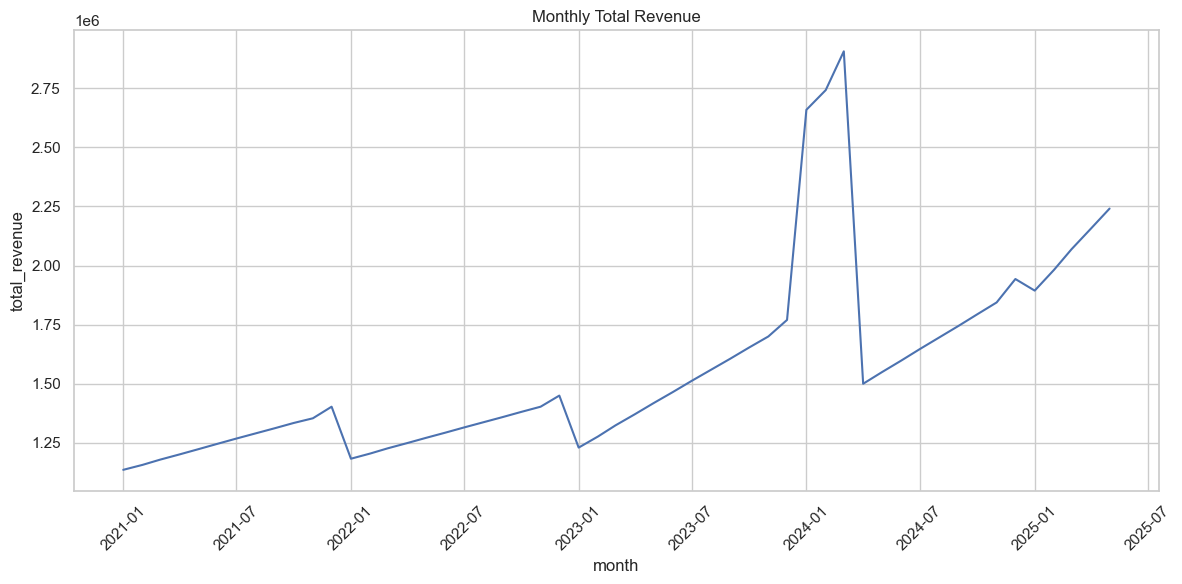

In [50]:
df['month'] = pd.to_datetime(df['month'])

monthly_revenue = df.groupby(df['month'].dt.to_period('M'))['total_revenue'].sum().reset_index()
monthly_revenue['month'] = monthly_revenue['month'].dt.to_timestamp()

plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_revenue, x='month', y='total_revenue')
plt.title('Monthly Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


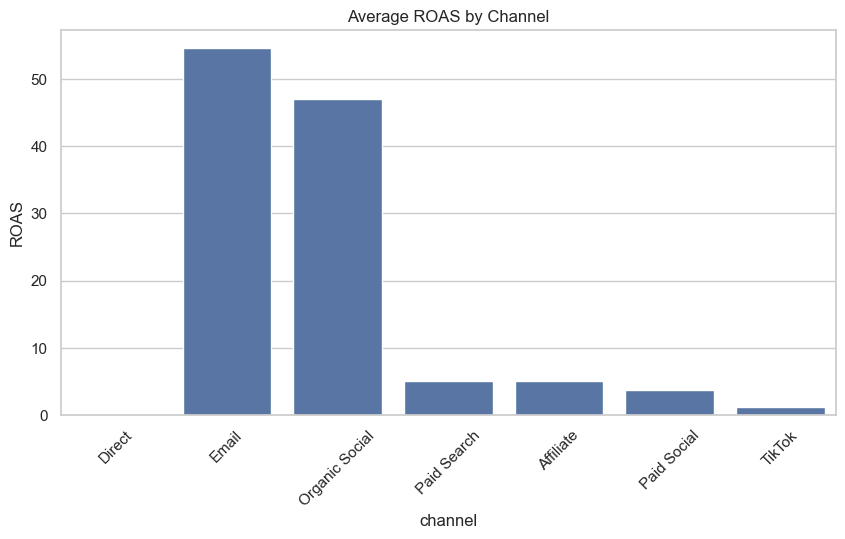

In [51]:
df['roas'] = df['total_revenue'] / df['total_spend']

roas_by_channel = df.groupby('channel')['roas'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=roas_by_channel.index, y=roas_by_channel.values)
plt.title('Average ROAS by Channel')
plt.ylabel('ROAS')
plt.xticks(rotation=45)
plt.show()


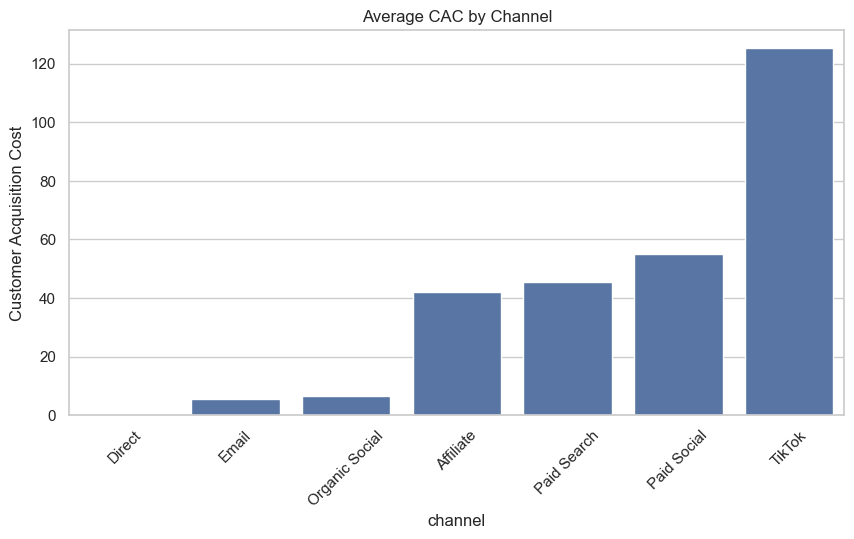

In [52]:
df['cac'] = df['total_spend'] / df['new_customers']
cac_by_channel = df.groupby('channel')['cac'].mean().sort_values()

plt.figure(figsize=(10,5))
sns.barplot(x=cac_by_channel.index, y=cac_by_channel.values)
plt.title('Average CAC by Channel')
plt.ylabel('Customer Acquisition Cost')
plt.xticks(rotation=45)
plt.show()


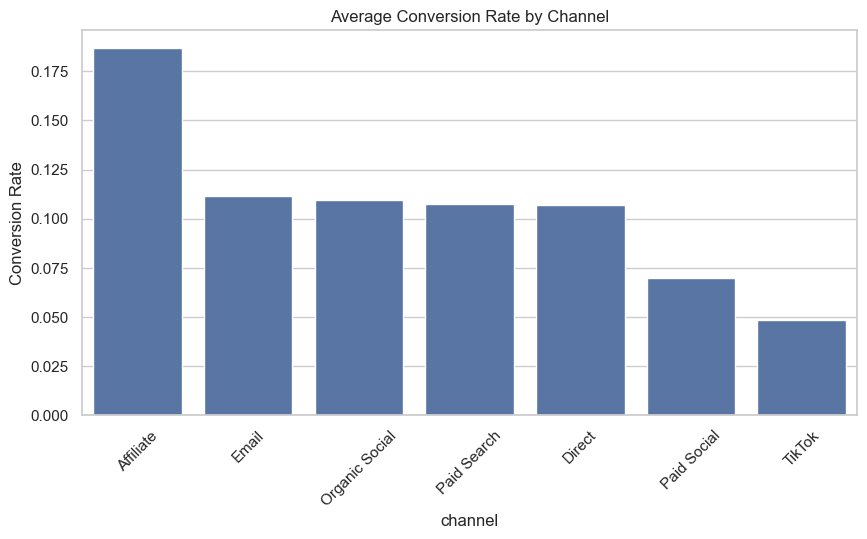

In [53]:
df['conversion_rate'] = df['total_orders'] / df['sessions']

conversion_by_channel = df.groupby('channel')['conversion_rate'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=conversion_by_channel.index, y=conversion_by_channel.values)
plt.title('Average Conversion Rate by Channel')
plt.ylabel('Conversion Rate')
plt.xticks(rotation=45)
plt.show()


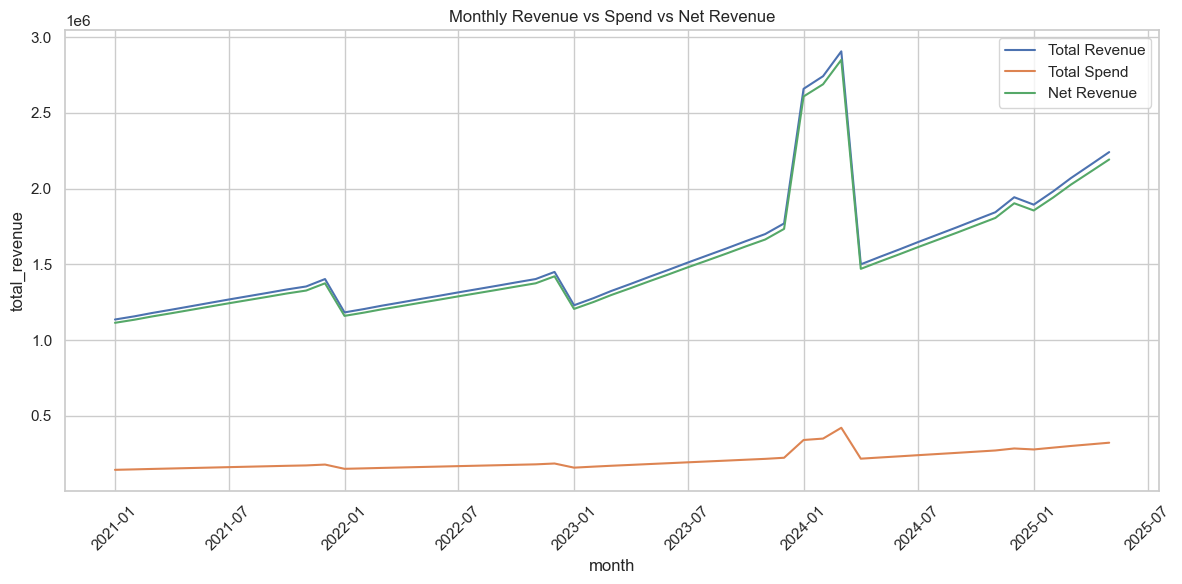

In [54]:
monthly = df.groupby(df['month'].dt.to_period('M')).agg({
    'total_revenue': 'sum',
    'total_spend': 'sum',
    'net_revenue': 'sum'
}).reset_index()
monthly['month'] = monthly['month'].dt.to_timestamp()

plt.figure(figsize=(12,6))
sns.lineplot(data=monthly, x='month', y='total_revenue', label='Total Revenue')
sns.lineplot(data=monthly, x='month', y='total_spend', label='Total Spend')
sns.lineplot(data=monthly, x='month', y='net_revenue', label='Net Revenue')
plt.title('Monthly Revenue vs Spend vs Net Revenue')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


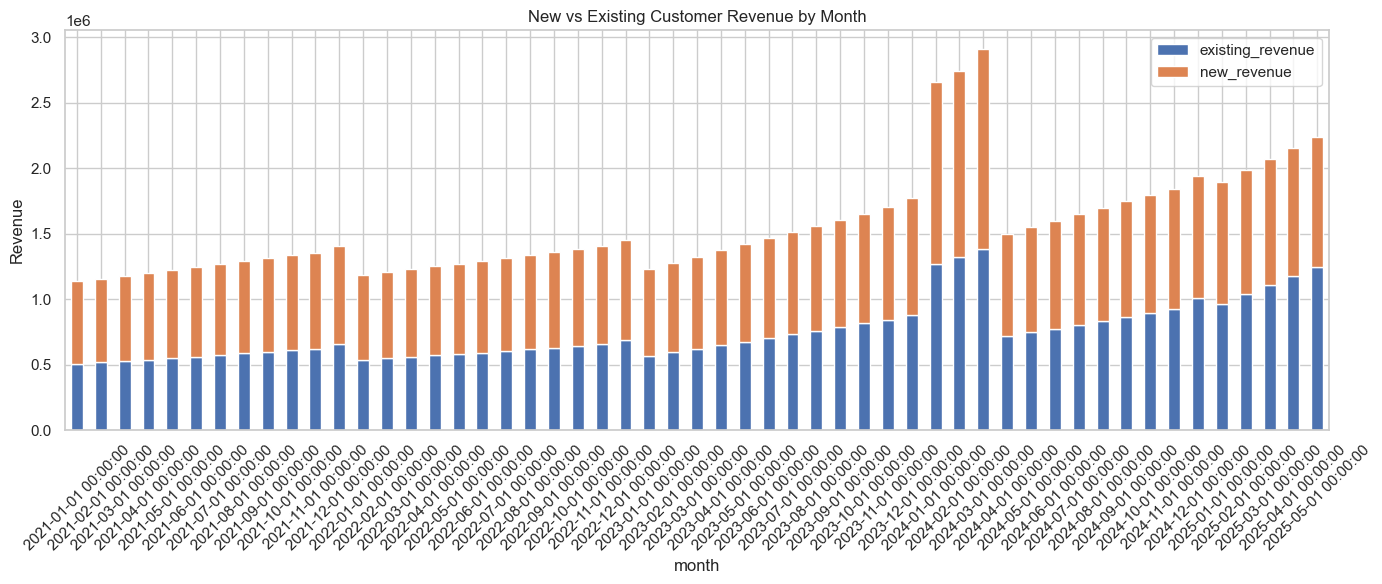

In [55]:
df['existing_revenue'] = df['existing_customer_orders'] * df['aov']
df['new_revenue'] = df['new_customer_orders'] * df['aov']

rev_type = df.groupby('month')[['existing_revenue', 'new_revenue']].sum().reset_index()
rev_type['month'] = pd.to_datetime(rev_type['month'])

rev_type.plot(x='month', kind='bar', stacked=True, figsize=(14,6))
plt.title('New vs Existing Customer Revenue by Month')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


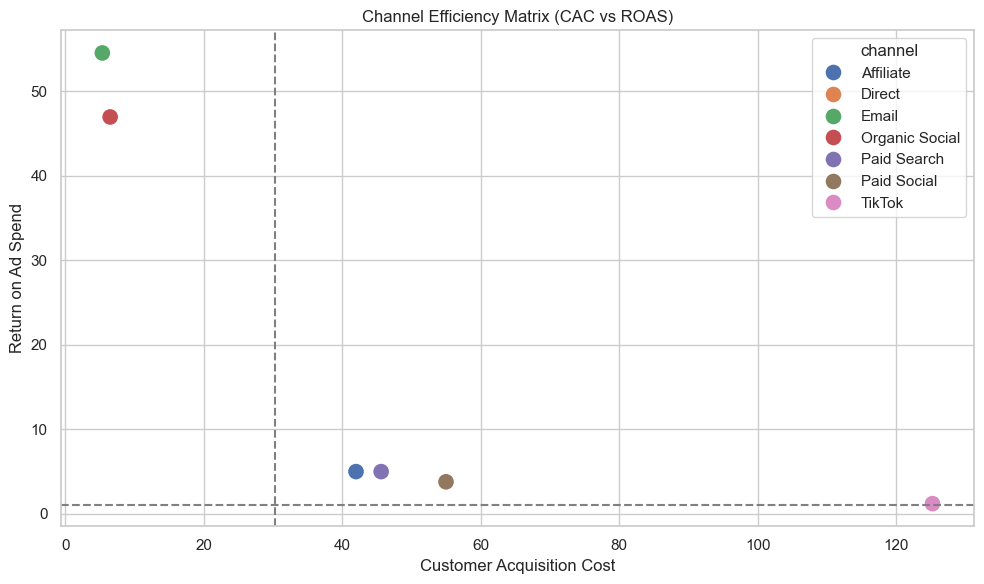

In [56]:
eff = df.groupby('channel').agg({
    'roas': 'mean',
    'cac': 'mean'
}).reset_index()

plt.figure(figsize=(10,6))
sns.scatterplot(data=eff, x='cac', y='roas', hue='channel', s=150)
plt.axhline(1, ls='--', color='gray')
plt.axvline(df['cac'].mean(), ls='--', color='gray')
plt.title('Channel Efficiency Matrix (CAC vs ROAS)')
plt.xlabel('Customer Acquisition Cost')
plt.ylabel('Return on Ad Spend')
plt.grid(True)
plt.tight_layout()
plt.show()



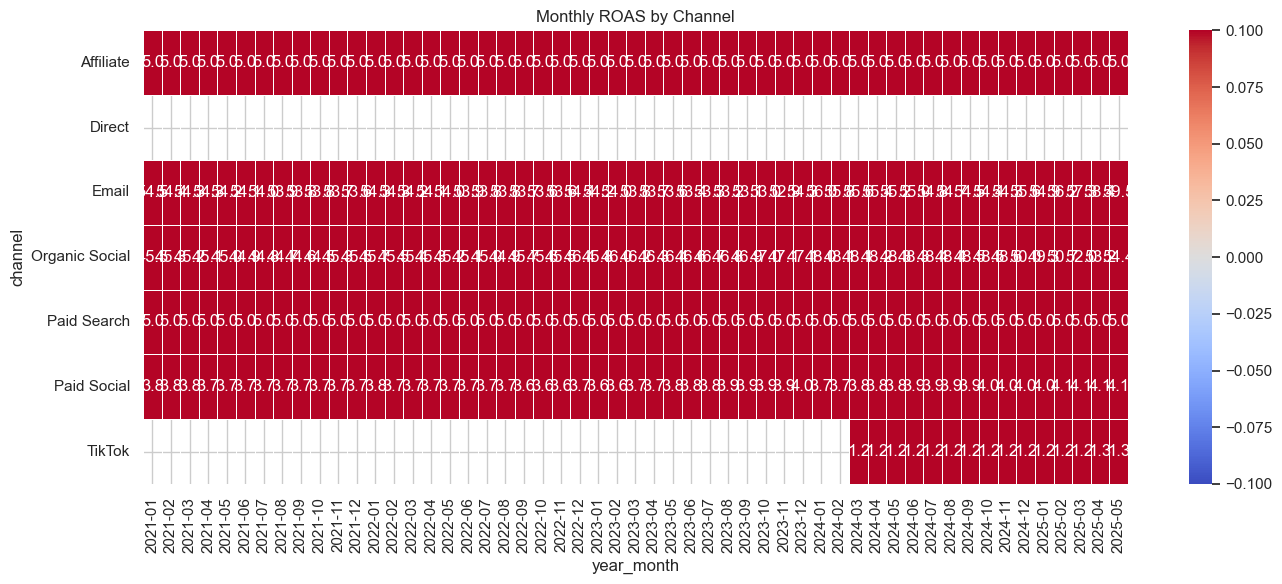

In [57]:
df['year_month'] = df['month'].dt.to_period('M')
heatmap_data = df.pivot_table(index='channel', columns='year_month', values='roas', aggfunc='mean')

plt.figure(figsize=(14,6))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="coolwarm", linewidths=0.5)
plt.title('Monthly ROAS by Channel')
plt.tight_layout()
plt.show()


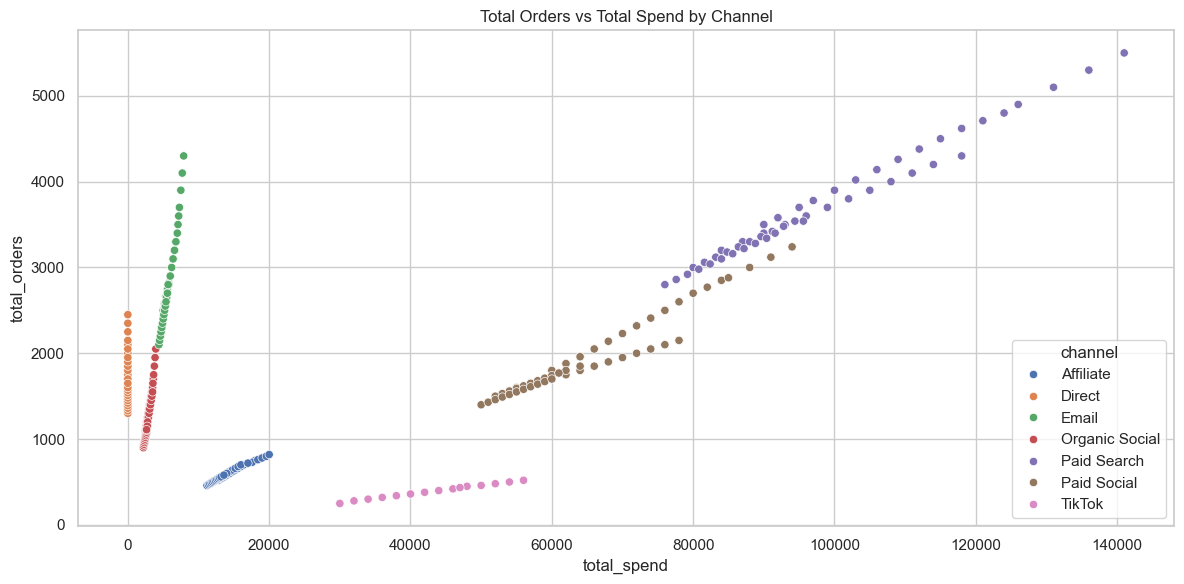

In [58]:
sns.scatterplot(data=df, x='total_spend', y='total_orders', hue='channel')
plt.title('Total Orders vs Total Spend by Channel')
plt.tight_layout()
plt.show()


In [59]:
# 📦 1. Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Plot settings
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

df.columns = df.columns.str.lower().str.strip()

# 🔍 3. Basic Overview
print("🔹 Dataset Shape:", df.shape)
print("🔹 Columns:", df.columns.tolist())
display(df.head())
print("🔹 Missing Values:\n", df.isnull().sum())

# ✨ Convert month to datetime
df['month'] = pd.to_datetime(df['month'])

# ───────────────────────────────────────────────
# 🧠 Q1: Who is driving my growth and profitability?
# ───────────────────────────────────────────────

# LTV per channel
df['ltv'] = df['total_revenue'] / df['new_customers'].replace(0, np.nan)
ltv_summary = df.groupby('channel')['ltv'].mean().sort_values(ascending=False)
print("📊 Avg LTV by Channel:")
print(ltv_summary)

# CAC per channel
df['cac'] = df['total_spend'] / df['new_customers'].replace(0, np.nan)
cac_summary = df.groupby('channel')['cac'].mean().sort_values()
print("\n📉 Avg CAC by Channel:")
print(cac_summary)

# Repeat purchase behavior
repeat_df = df.groupby('channel')['existing_customer_orders'].sum().sort_values(ascending=False)
print("\n🔁 Repeat Customer Orders by Channel:")
print(repeat_df)

# ───────────────────────────────────────────────
# 🧠 Q2: Where is that growth coming from?
# ───────────────────────────────────────────────

# ROAS: Revenue / Spend
df['roas'] = df['total_revenue'] / df['total_spend'].replace(0, np.nan)
roas_summary = df.groupby('channel')['roas'].mean().sort_values(ascending=False)
print("\n💸 Avg ROAS by Channel:")
print(roas_summary)

# Revenue vs Spend Trend (monthly)
monthly = df.groupby('month')[['total_revenue', 'total_spend']].sum().reset_index()
print("\n📈 Monthly Revenue & Spend Summary:")
print(monthly.tail())

# Optional Plot
# monthly.plot(x='month', y=['total_revenue', 'total_spend'], title='Revenue vs Spend Over Time')

# ───────────────────────────────────────────────
# 🧠 Q3: What should I be selling more or less of?
# ───────────────────────────────────────────────

# Net Revenue = total_revenue - returns_value_dist - technology_spend
df['net_revenue_calc'] = df['total_revenue'] - df['returns_value_dist'] - df['technology_spend']
net_rev_summary = df.groupby('channel')['net_revenue_calc'].sum().sort_values(ascending=False)
print("\n💰 Net Revenue by Channel:")
print(net_rev_summary)

# Return Rate by Channel
df['return_rate'] = df['returns_value_dist'] / df['total_revenue'].replace(0, np.nan)
return_rate_summary = df.groupby('channel')['return_rate'].mean().sort_values()
print("\n📦 Avg Return Rate by Channel:")
print(return_rate_summary)

# ───────────────────────────────────────────────
# 📤 Export Summary Tables (Optional)
# ───────────────────────────────────────────────
summary_dfs = {
    "LTV_by_channel": ltv_summary,
    "CAC_by_channel": cac_summary,
    "Repeat_orders_by_channel": repeat_df,
    "ROAS_by_channel": roas_summary,
    "Net_revenue_by_channel": net_rev_summary,
    "Return_rate_by_channel": return_rate_summary,
}

for name, df_summary in summary_dfs.items():
    df_summary.to_csv(f"{name}.csv")


🔹 Dataset Shape: (352, 27)
🔹 Columns: ['month', 'channel', 'total_revenue', 'total_orders', 'aov', 'total_spend', 'new_customers', 'existing_customers', 'new_customer_orders', 'existing_customer_orders', 'sessions', 'users', 'spend', 'impressions', 'clicks', 'returned_value', 'technology_spend', 'revenue_share', 'returns_value_dist', 'technology_spend_dist', 'net_revenue', 'roas', 'cac', 'conversion_rate', 'existing_revenue', 'new_revenue', 'year_month']


,month,channel,total_revenue,total_orders,aov,total_spend,new_customers,existing_customers,new_customer_orders,existing_customer_orders,...,revenue_share,returns_value_dist,technology_spend_dist,net_revenue,roas,cac,conversion_rate,existing_revenue,new_revenue,year_month
0,2024-01-01,Affiliate,64319.0,523.0,122.98,12864.0,306.0,102.0,310.0,213.0,...,0.05,1250.0,750.0,63069.0,4.999922,42.039216,0.186786,26194.74,38123.80,2024-01
1,2024-01-01,Direct,195000.0,1500.0,130.00,0.0,800.0,1200.0,810.0,690.0,...,0.15,3750.0,2250.0,191250.0,inf,0.000000,0.107143,89700.00,105300.00,2024-01
2,2024-01-01,Email,280000.0,2500.0,112.00,5000.0,1000.0,4000.0,1010.0,1490.0,...,0.21,5250.0,3150.0,274750.0,56.000000,5.000000,0.108696,166880.00,113120.00,2024-01
3,2024-01-01,Organic Social,120000.0,1100.0,109.09,2500.0,400.0,1600.0,405.0,695.0,...,0.09,2250.0,1350.0,117750.0,48.000000,6.250000,0.110000,75817.55,44181.45,2024-01
4,2024-01-01,Paid Search,450000.0,3500.0,128.57,90000.0,2000.0,800.0,2020.0,1480.0,...,0.34,8500.0,5100.0,441500.0,5.000000,45.000000,0.109375,190283.60,259711.40,2024-01


🔹 Missing Values:
 month                       0
channel                     0
total_revenue               0
total_orders                0
aov                         0
total_spend                 0
new_customers               0
existing_customers          0
new_customer_orders         0
existing_customer_orders    0
sessions                    0
users                       0
spend                       0
impressions                 0
clicks                      0
returned_value              0
technology_spend            0
revenue_share               0
returns_value_dist          0
technology_spend_dist       0
net_revenue                 0
roas                        0
cac                         0
conversion_rate             0
existing_revenue            0
new_revenue                 0
year_month                  0
dtype: int64
📊 Avg LTV by Channel:
channel
Organic Social    305.382978
Email             292.497237
Direct            243.292348
Paid Search       228.074542
Affiliate   

In [61]:
df['net_revenue_calc'].sum()
df['total_revenue'].sum()


np.float64(82625638.0)

<Axes: xlabel='year_month'>

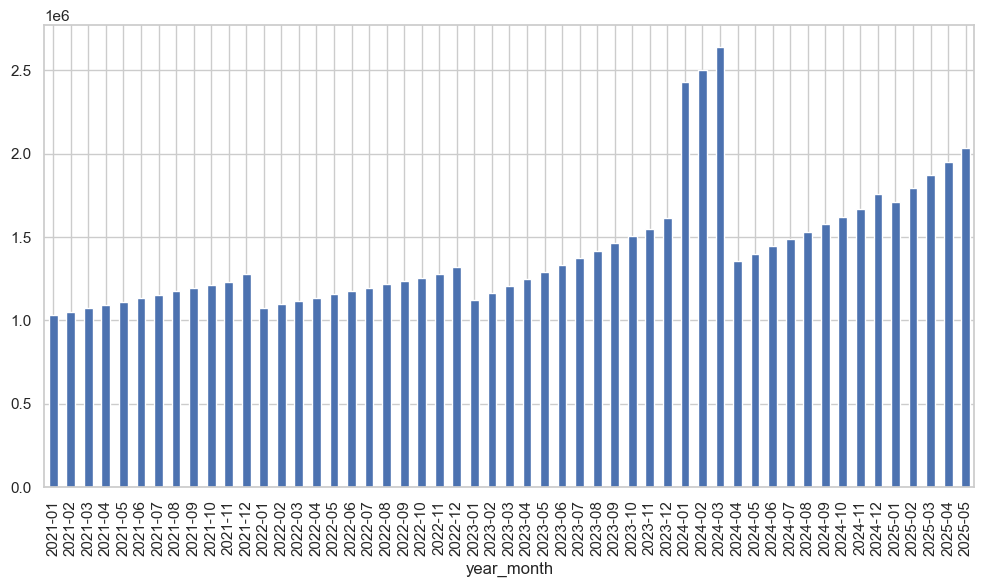

In [62]:
df.groupby('year_month')['net_revenue_calc'].sum().plot(kind='bar')

In [63]:
df.isna().sum()

month                        0
channel                      0
total_revenue                0
total_orders                 0
aov                          0
total_spend                  0
new_customers                0
existing_customers           0
new_customer_orders          0
existing_customer_orders     0
sessions                     0
users                        0
spend                        0
impressions                  0
clicks                       0
returned_value               0
technology_spend             0
revenue_share                0
returns_value_dist           0
technology_spend_dist        0
net_revenue                  0
roas                        56
cac                          0
conversion_rate              0
existing_revenue             0
new_revenue                  0
year_month                   0
ltv                          0
net_revenue_calc             0
return_rate                  0
dtype: int64

In [66]:
df.to_csv('Verified.csv', index=False)


In [68]:
# Ensure 'month' is in datetime format
df['month'] = pd.to_datetime(df['month'])

# Filter rows where year is 2024
df_2024 = df[df['month'].dt.year == 2024]

# Now calculate total orders by channel
order_check = df_2024.groupby('channel')['total_orders'].sum().sort_values(ascending=False)
print(order_check)

# Optional: Total across all channels
print("\nTotal 2024 Orders:", df_2024['total_orders'].sum())


channel
Paid Search       59960.0
Email             43540.0
Paid Social       33080.0
Direct            26000.0
Organic Social    20000.0
Affiliate          9196.0
TikTok             3750.0
Name: total_orders, dtype: float64

Total 2024 Orders: 195526.0


In [69]:
df_2024['total_spend'].sum()


np.float64(3351928.0)

In [70]:
# Check for complete duplicate rows
duplicate_rows = df[df.duplicated()]
print(f"Number of duplicate rows: {len(duplicate_rows)}")


Number of duplicate rows: 0


In [71]:
df

,month,channel,total_revenue,total_orders,aov,total_spend,new_customers,existing_customers,new_customer_orders,existing_customer_orders,...,net_revenue,roas,cac,conversion_rate,existing_revenue,new_revenue,year_month,ltv,net_revenue_calc,return_rate
0,2024-01-01,Affiliate,64319.0,523.0,122.98,12864.0,306.0,102.0,310.0,213.0,...,63069.0,4.999922,42.039216,0.186786,26194.74,38123.80,2024-01,210.192810,48069.00,0.019434
1,2024-01-01,Direct,195000.0,1500.0,130.00,0.0,800.0,1200.0,810.0,690.0,...,191250.0,NaN,0.000000,0.107143,89700.00,105300.00,2024-01,243.750000,176250.00,0.019231
2,2024-01-01,Email,280000.0,2500.0,112.00,5000.0,1000.0,4000.0,1010.0,1490.0,...,274750.0,56.000000,5.000000,0.108696,166880.00,113120.00,2024-01,280.000000,259750.00,0.018750
3,2024-01-01,Organic Social,120000.0,1100.0,109.09,2500.0,400.0,1600.0,405.0,695.0,...,117750.0,48.000000,6.250000,0.110000,75817.55,44181.45,2024-01,300.000000,102750.00,0.018750
4,2024-01-01,Paid Search,450000.0,3500.0,128.57,90000.0,2000.0,800.0,2020.0,1480.0,...,441500.0,5.000000,45.000000,0.109375,190283.60,259711.40,2024-01,225.000000,426500.00,0.018889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,2021-12-01,Email,300000.0,2700.0,111.11,5600.0,1070.0,4280.0,1080.0,1620.0,...,294011.0,53.571429,5.233645,0.103846,179998.20,119998.80,2021-12,280.373832,277511.08,0.019963
349,2021-12-01,Organic Social,125000.0,1150.0,108.70,2750.0,440.0,1760.0,450.0,700.0,...,122505.0,45.454545,6.250000,0.109524,76090.00,48915.00,2021-12,284.090909,106005.20,0.019958
350,2021-12-01,Paid Search,478000.0,3540.0,135.03,95600.0,2108.0,843.0,2125.0,1415.0,...,468459.0,5.000000,45.351044,0.107273,191067.45,286938.75,2021-12,226.755218,451959.56,0.019959
351,2021-12-01,Paid Social,227000.0,1770.0,128.25,61000.0,1100.0,440.0,1110.0,660.0,...,222468.0,3.721311,55.454545,0.066792,84645.00,142357.50,2021-12,206.363636,205968.48,0.019963
